In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder as TE
import plotly.express as px



c:\Users\ACER\anaconda3\lib\site-packages\xarray\core\pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
c:\Users\ACER\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
c:\Users\ACER\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
c:\Users\ACER\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\ACER\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packa

In [6]:
#mengambil data dan membersihkan dari missing value
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("Groceries_dataset.csv", na_values = missing_values)
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [7]:
#menambahkan kolom baru untuk menghitung jumlah kemunculan
df["incident_count"] = 1 


# Membuat visualisasi jumlah kemunculan
df_table = df.groupby(['itemDescription']).sum().sort_values("incident_count", ascending=False).reset_index()

# Menampilkan 5 kemunculan teratas pada tabel
df_table.head(5).style.background_gradient(cmap='Blues')



,itemDescription,Member_number,incident_count
0,whole milk,7542654,2502
1,other vegetables,5743525,1898
2,rolls/buns,5157630,1716
3,soda,4531592,1514
4,yogurt,3882446,1334


In [8]:
# Menampilkan 50 data teratas
df_table["all"] = "Top 50 items" 

# membuat visualisasi dengan treemap
fig = px.treemap(df_table.head(50), path=['all', "itemDescription"], values='incident_count',
                  color=df_table["incident_count"].head(50), hover_data=['itemDescription'],
                  color_continuous_scale='Blues',
                )

fig.show()

c:\Users\ACER\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
c:\Users\ACER\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
c:\Users\ACER\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\ACER\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [95]:
#mengelompokkan data berdasarkan id dan tanggal yang sama
df_out = df.groupby(['Member_number','Date'])['itemDescription'].agg(list)


In [96]:
#Mengubah menjadi tabel true or false value
te = TE()
te_ary = te.fit(df_out).transform(df_out)
df_out = pd.DataFrame(te_ary, columns=te.columns_)
df_out

from mlxtend.frequent_patterns import fpgrowth

res=fpgrowth(df_out, min_support=0.005,use_colnames=True)
res

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
121,0.007151,"(whole milk, bottled beer)"
122,0.005280,"(whole milk, domestic eggs)"
123,0.005614,"(whole milk, newspapers)"
124,0.007151,"(whole milk, citrus fruit)"


In [97]:
from mlxtend.frequent_patterns import association_rules

# membuat association rules 
res=association_rules(res, metric="lift", min_threshold=0.9)

# meanmpilkan hasil association rules berdasarkan nilai confidencenya
summary = res.sort_values("confidence",ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
0,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
13,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114
11,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834
6,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
5,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613
2,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345
3,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049
4,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963
1,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140


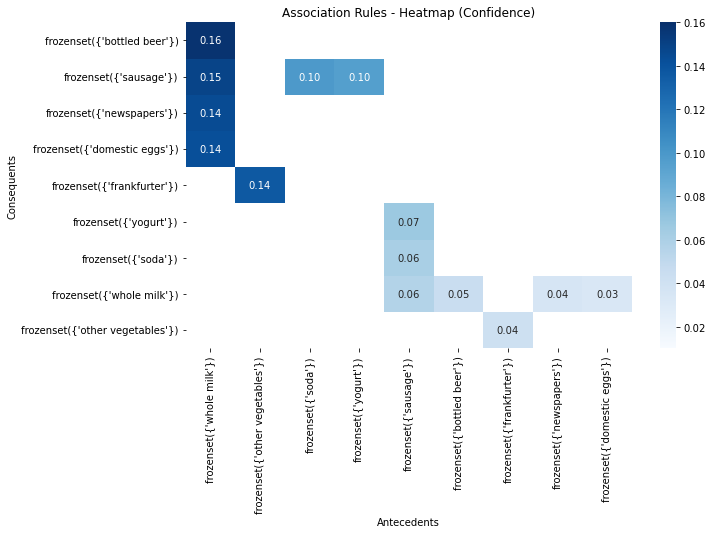

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# mengurutkan hasil  association rules berdasarkan nilai confidencenya
res_sorted = res.sort_values(by='confidence', ascending=False)
res_sorted = res_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# membuat pivot data untuk visualisasi dengna heatmap
heatmap_data_pivot = res_sorted.pivot(index='antecedents', columns='consequents', values='confidence')

# membuat visualisasi dengan heatmap berdasarkan nilai confidencenya
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_pivot, annot=True, cmap='Blues', fmt='.2f', vmin=0.01, vmax=0.16)
plt.title('Association Rules - Heatmap (Confidence)')
plt.ylabel('Consequents')
plt.xlabel('Antecedents')
plt.show()
